In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True # this is because some image is truncated
# the bug will make the training process will failed
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
data_dir1 = Path('C:/Users/DC/Downloads/x_ray/bon')
train_dir1 = data_dir1 / 'train'
test_dir1 = data_dir1 / 'test'
val_dir1 = data_dir1 / 'val'


In [4]:
data_dir2 = Path('C:/Users/DC/Downloads/x_ray/lung')
train_dir2 = data_dir2 / 'train'
test_dir2 = data_dir2 / 'test'
val_dir2 = data_dir2 / 'val'


In [5]:
BATCH_SIZE = 16
IMG_HEIGHT = 180
IMG_WIDTH = 180

In [6]:
train_ds1 = tf.keras.preprocessing.image_dataset_from_directory(train_dir1,
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)
test_ds1 = tf.keras.preprocessing.image_dataset_from_directory(test_dir1,
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)
val_ds1 = tf.keras.preprocessing.image_dataset_from_directory(val_dir1,
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)

Found 9246 files belonging to 2 classes.
Found 506 files belonging to 2 classes.
Found 829 files belonging to 2 classes.


In [7]:
train_ds2 = tf.keras.preprocessing.image_dataset_from_directory(train_dir2,
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)
test_ds2 = tf.keras.preprocessing.image_dataset_from_directory(test_dir2,
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)
val_ds2 = tf.keras.preprocessing.image_dataset_from_directory(val_dir2,
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)

Found 6350 files belonging to 4 classes.
Found 771 files belonging to 4 classes.
Found 38 files belonging to 4 classes.


In [9]:
class_names1 = train_ds1.class_names
class_names1

['fractured', 'not fractured']

In [8]:
class_names2 = train_ds2.class_names
class_names2

['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']

In [10]:
class_names = train_ds1.class_names

def show_images(dataset, title):
    plt.figure(figsize=(6, 6))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i+1)
            plt.imshow(images[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])
            plt.axis('off')
    plt.suptitle(title)
    plt.show()

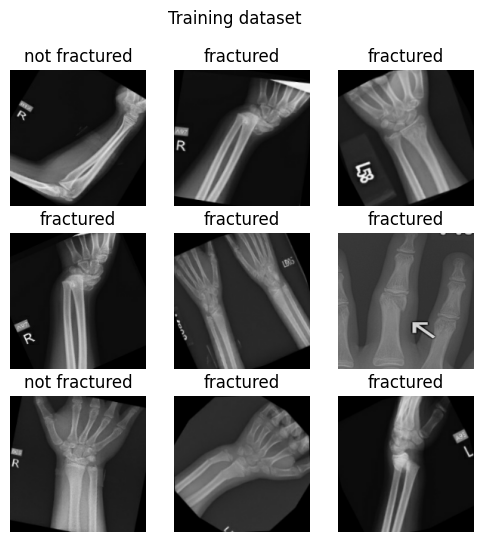

In [11]:
show_images(train_ds1, 'Training dataset')


In [12]:
class_names = train_ds2.class_names

def show_images(dataset, title):
    plt.figure(figsize=(6, 6))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i+1)
            plt.imshow(images[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])
            plt.axis('off')
    plt.suptitle(title)
    plt.show()

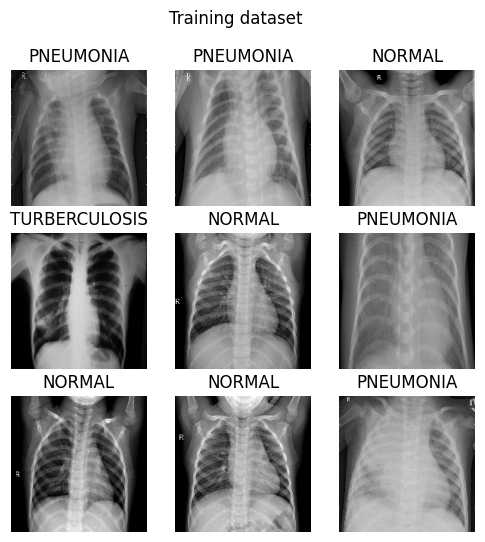

In [13]:
show_images(train_ds2, 'Training dataset')


In [14]:
def count_classes(dataset, class_name):
    return len(list(Path.glob(dataset, f"{class_name}/*")))

def create_class_counts_df(dataset, class_names):
    counts = {'class':[], 'count': []}
    for class_name in class_names:
        counts['class'].append(class_name)
        counts['count'].append(count_classes(dataset, class_name))
    return pd.DataFrame(counts)

def plot_class_distribution(df, title, palette="viridis"):
    sns.barplot(x='class', y='count', data=df, palette=palette)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

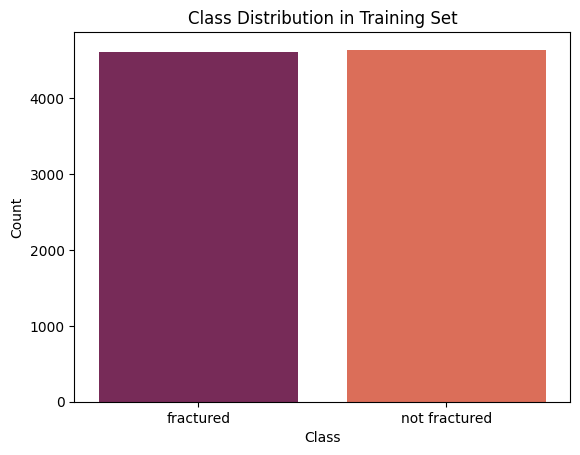

In [15]:
train_df = create_class_counts_df(train_dir1, class_names1)
plot_class_distribution(train_df, 'Class Distribution in Training Set', palette='rocket')

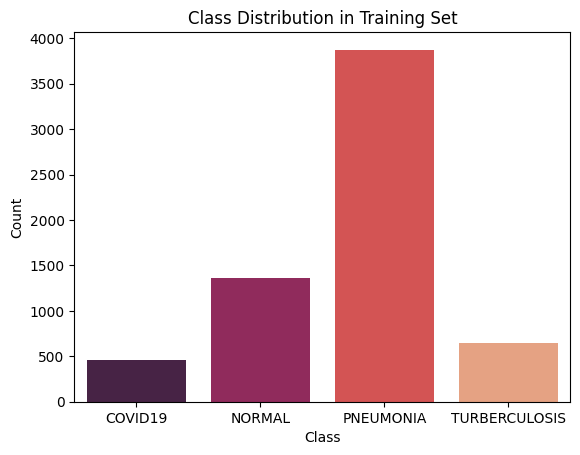

In [16]:
train_df = create_class_counts_df(train_dir2, class_names2)
plot_class_distribution(train_df, 'Class Distribution in Training Set', palette='rocket')

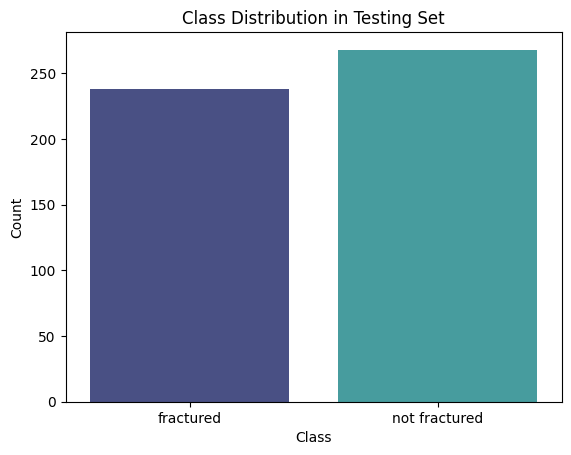

In [18]:
test_df = create_class_counts_df(test_dir1, class_names1)
plot_class_distribution(test_df, 'Class Distribution in Testing Set', palette='mako')

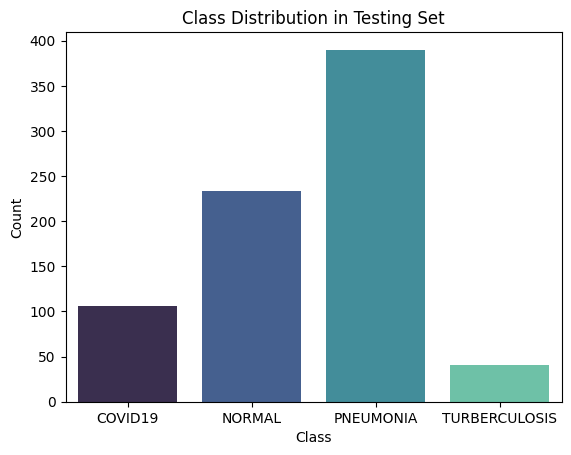

In [17]:
test_df = create_class_counts_df(test_dir2, class_names2)
plot_class_distribution(test_df, 'Class Distribution in Testing Set', palette='mako')

In [20]:
train_datagen1 = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  rotation_range=10,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1)
test_datagen1 = ImageDataGenerator(rescale=1./255)
val_datagen1 = ImageDataGenerator(rescale=1./255)

In [21]:
train_datagen2 = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  rotation_range=10,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1)
test_datagen2 = ImageDataGenerator(rescale=1./255)
val_datagen2 = ImageDataGenerator(rescale=1./255)

In [22]:
training_set1 = train_datagen1.flow_from_directory(train_dir1,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                batch_size=16,
                                                class_mode='binary')

Found 9246 images belonging to 2 classes.


In [23]:
training_set2 = train_datagen2.flow_from_directory(train_dir2,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                batch_size=16,
                                                class_mode='binary')

Found 6350 images belonging to 4 classes.


In [24]:
test_set1 = train_datagen1.flow_from_directory(test_dir1,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                batch_size=16,
                                                class_mode='binary')

Found 506 images belonging to 2 classes.


In [25]:
test_set2 = train_datagen2.flow_from_directory(test_dir2,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                batch_size=16,
                                                class_mode='binary')

Found 771 images belonging to 4 classes.


In [26]:
val_set1 = train_datagen1.flow_from_directory(val_dir1,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                batch_size=16,
                                                class_mode='binary')

Found 829 images belonging to 2 classes.


In [27]:
val_set2 = train_datagen2.flow_from_directory(val_dir2,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                batch_size=16,
                                                class_mode='binary')

Found 38 images belonging to 4 classes.


# **Create Model CNN**

In [33]:
model_by_priyen1 = models.Sequential([
    layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_by_priyen1.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │       1,327,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,715,649 (6.54 MB)

 Trainable params: 1,715,649 (6.54 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model_by_priyen2 = models.Sequential([
    layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])
model_by_priyen2.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │       1,327,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,715,844 (6.55 MB)

 Trainable params: 1,715,844 (6.55 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model_by_priyen1.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [40]:
model_by_priyen2.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [38]:
history_1 = model_by_priyen1.fit(training_set1,
                   validation_data=val_set1,
                   epochs=10 # using simple epoch, to evaluate the addition of 256 filter
                   )

Epoch 1/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 121s 204ms/step - accuracy: 0.5695 - loss: 0.6737 - val_accuracy: 0.6502 - val_loss: 0.6532
Epoch 2/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 109s 187ms/step - accuracy: 0.7501 - loss: 0.5160 - val_accuracy: 0.7841 - val_loss: 0.4700
Epoch 3/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 109s 187ms/step - accuracy: 0.8391 - loss: 0.3585 - val_accuracy: 0.8034 - val_loss: 0.4429
Epoch 4/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 108s 186ms/step - accuracy: 0.8954 - loss: 0.2551 - val_accuracy: 0.8552 - val_loss: 0.3354
Epoch 5/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 110s 189ms/step - accuracy: 0.9226 - loss: 0.1849 - val_accuracy: 0.8601 - val_loss: 0.3444
Epoch 6/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 109s 188ms/step - accuracy: 0.9389 - loss: 0.1568 - val_accuracy: 0.8902 - val_loss: 0.2824
Epoch 7/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 109s 187ms/step - accuracy: 0.9523 - loss: 0.1212 - val_accuracy: 0.8806 - val_loss: 0.3087
Epoch 8/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 111s 190ms/step - accuracy: 0.9628 -

In [41]:
history_2 = model_by_priyen2.fit(training_set2,
                   validation_data=val_set2,
                   epochs=10 # using simple epoch, to evaluate the addition of 256 filter
                   )

Epoch 1/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 105s 257ms/step - accuracy: 0.6501 - loss: 0.8753 - val_accuracy: 0.6842 - val_loss: 1.1602
Epoch 2/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 103s 255ms/step - accuracy: 0.8125 - loss: 0.4822 - val_accuracy: 0.7895 - val_loss: 0.7146
Epoch 3/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 102s 254ms/step - accuracy: 0.8652 - loss: 0.3527 - val_accuracy: 0.7895 - val_loss: 0.5016
Epoch 4/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 101s 251ms/step - accuracy: 0.8918 - loss: 0.2921 - val_accuracy: 0.7368 - val_loss: 0.6544
Epoch 5/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 102s 254ms/step - accuracy: 0.8912 - loss: 0.2740 - val_accuracy: 0.7632 - val_loss: 0.6692
Epoch 6/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 102s 254ms/step - accuracy: 0.9276 - loss: 0.2137 - val_accuracy: 0.8158 - val_loss: 0.3743
Epoch 7/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 102s 254ms/step - accuracy: 0.9149 - loss: 0.2249 - val_accuracy: 0.7895 - val_loss: 0.6155
Epoch 8/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 101s 251ms/step - accuracy: 0.9267 -

In [43]:
test_loss_1, test_acc_1 = model_by_priyen1.evaluate(test_set1)
print(f"Test Loss: {test_loss_1:.2f}")
print(f"Test Accurracy: {test_acc_1:.2f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.9051 - loss: 0.1898
Test Loss: 0.19
Test Accurracy: 0.92


In [44]:
test_loss_2, test_acc_2 = model_by_priyen2.evaluate(test_set2)
print(f"Test Loss: {test_loss_2:.2f}")
print(f"Test Accurracy: {test_acc_2:.2f}")


49/49 ━━━━━━━━━━━━━━━━━━━━ 15s 310ms/step - accuracy: 0.8281 - loss: 0.4690
Test Loss: 0.46
Test Accurracy: 0.83


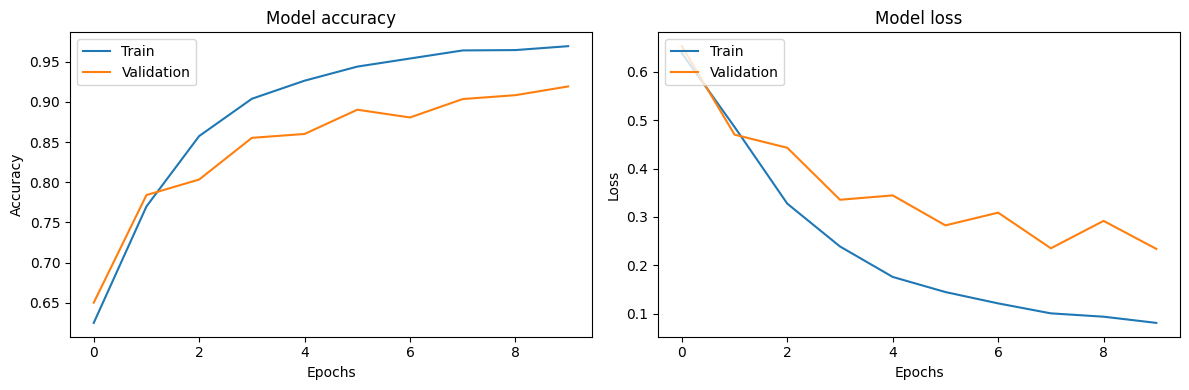

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

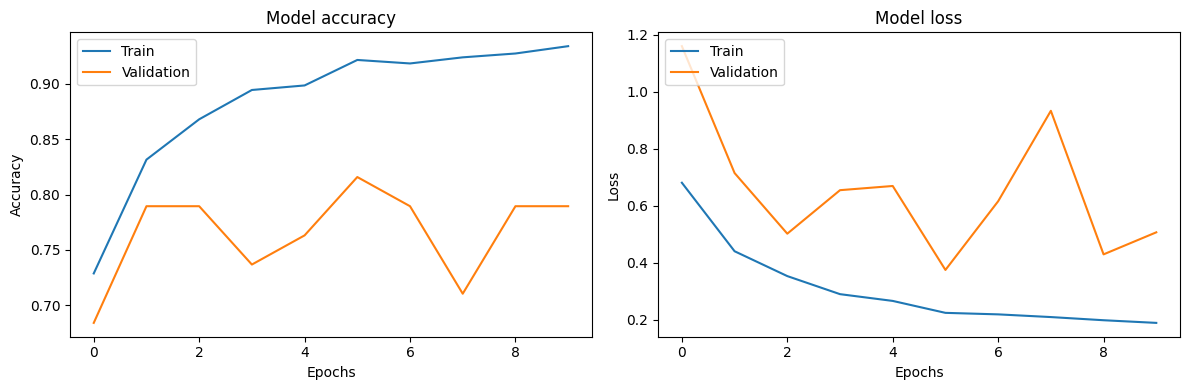

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [48]:
model_by_priyen1.save('C:/Users/DC/Downloads/x_ray/bon_fracture.keras')

In [50]:
model_by_priyen2.save('C:/Users/DC/Downloads/x_ray/Lung.h5')